# Task 1 - Statistical analysis 

## 1. Introduction 

In this part of the task, a statistical analysis we will be performed to compare the performance of the heuristic algorithm against Dijkstra.  

In doing so, it will also characterize: 
- the **length of** the **shortest path** 
- the **elapsed time** of the algorithms

In dependence on several of the grid's parameters for Dijsktra's algorithm. These parameters are:

- the grid's **size**
- the **probability distribution** from which cell numbers are generated.


## 2. Analysis

The analysis is divided into three parts:

1. **Heuristic vs Dijkstra**: this part includes a brief description of how the heuristic algorithm works. Then, an performance evaluation will be performed of both algorithms in a small grid of size 4x4 for visualization purposes. Finally, the issues found with the heuristic algorithm will be presented, specifying how Dijkstra solves them.


2. **Algorithmic Performance**: this part includes a performance evaluation of the Heuristic and Dijkstra algorithms' when incrementing the grid's size and adjusting different distributions to generate the cell numbers. 


3. **Conclusions**: this last part includes a remarks section with relevant observations. 

### 2.1 Heuristic vs Dijkstra 

#### 2.1.1 Algorithm descriptions 

**The Heuristic Algorithm** 

At the start of the algorithm, the following objects are initialized: 

- the variable `timestep`: to store the cumulative timesteps the agent spends on each of the cells on the shortest path.


- the list `shortest_path`: to keep track of the cells in the shortest path. 


The algorithm's steps are: 

1. The agent starts in the grid's upper-left corner, corresponding to the grid's first cell. It stores the cell's number in `timestep`. 


2. It moves onto the adjacent cells (i.e., the one to the right and directly below). It evaluates each one and moves into the cell with fewer timesteps, adding the cell's number to `timestep` and storing the cell's name in `shortest_path.` 


3. It repeats this process until it reaches the grid's lower-right corner corresponding to the last cell, adding its number to `timestep` and name to `shortest_path.` 



Let us view this with an example. 

In [2]:
# First, we import useful modules and packages. 
from IPython.display import display
from Implementation import Grid
import pandas as pd 
from Strategies import Shortest_Path
import random
import sys
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [56]:
def print_grid(grid): 
    df = pd.DataFrame(data=grid, index=None)
    print(df)
    
    
def plot_grid(grid):

    fig, ax = plt.subplots()

    ax.matshow(grid, cmap=ListedColormap('w'))

    for (i, j), z in np.ndenumerate(grid):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    plt.axis('off')
    plt.show()
    
def evaluate(x, y, x_label, y_label):
    import seaborn as sns
    import numpy as np
    import pandas as pd
    
    x = np.asarray(x)
    y = np.asarray(y)
    df = pd.DataFrame()
    df[x_label] = x
    df[y_label] = y
    labels = df.columns
    
    sns.set_theme()
    sns.relplot(
        data=df, kind="line",
        x=labels[0], y=labels[1],
    )

In [4]:
#We create an instant of the class Shortest_Path, including the heuristic_algorithm and dijkstra_algorithm methods.
game = Shortest_Path(4, 4)

#generate random grid
random_seed = 3 
grid = game.generate_random_grid(random_seed)

print_grid(grid)
#plot_grid(grid)

     0    1    2    3
0  8.0  3.0  8.0  8.0
1  0.0  5.0  3.0  5.0
2  7.0  6.0  0.0  4.0
3  7.0  8.0  1.0  6.0


In [5]:
#we use the the heuristic_algorithm method

shortest_path, timestep = game.heuristic_algorithm(grid)

print('Shortest path: ')
print(shortest_path)
print('')
print('Heuristic Timesteps: ')
print(timestep)

Shortest path: 
['node_00', 'node_10', 'node_11', 'node_12', 'node_22', 'node_32', 'node_33']

Heuristic Timesteps: 
23.0


Let us compare this result with the Dijkstra algorithm.

In [6]:
#we use the dijkstra_algorithm method

shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)

print('Shortest path: ')
print(shortest_path)
print('')
print('Dijkstra Timesteps: ')
print(timestep)


Shortest path: 
{'node_00': 8.0, 'node_01': 11.0, 'node_02': 19.0, 'node_03': 27.0, 'node_10': 8.0, 'node_11': 13.0, 'node_12': 16.0, 'node_13': 21.0, 'node_20': 15.0, 'node_21': 19.0, 'node_22': 16.0, 'node_23': 20.0, 'node_30': 22.0, 'node_31': 27.0, 'node_32': 17.0, 'node_33': 23.0}

Dijkstra Timesteps: 
23.0


The results show that both algorithms coincide in the number of timesteps. 

Nevertheless, it is important to emphasize the difference in how `shortest_path` is presented in both algorithms. 

- In the heuristic algorithm,`shortest_path` is presented as a list containing the sequence of cells visited by the agent. 

- In the Dijkstra algorithm, `shortest_path` is a dictionary. It includes all the cells with their tentative distance to their neighbor with fewer timesteps. The Dijkstra algorithm visits all the nodes before it stops.    

    *Note: the* tentative distance *of a given cell is the length of the shortest path discovered so far between that cell and the starting node.*
 

Let us visualize it to see it more clearly:

In [7]:
print("Grid:")
print('')
print_grid(grid)
print('')
print("Tentative distances: ")
print('')
print_grid(shortest_path_grid)
print('')

print("Shortest_Path:")
print('')
print("Start at node_00," + f" from {previous_nodes['node_01']} move to node_01," 
      + f" from {previous_nodes['node_11']} move to node_11, etc.")


Grid:

     0    1    2    3
0  8.0  3.0  8.0  8.0
1  0.0  5.0  3.0  5.0
2  7.0  6.0  0.0  4.0
3  7.0  8.0  1.0  6.0

Tentative distances: 

      0     1     2     3
0   8.0  11.0  19.0  27.0
1   8.0  13.0  16.0  21.0
2  15.0  19.0  16.0  20.0
3  22.0  27.0  17.0  23.0

Shortest_Path:

Start at node_00, from node_00 move to node_01, from node_10 move to node_11, etc.


#### 2.1.2. Issues with the heuristic algorithm

At first glance, both algorithms perform their tasks well. However, upon further analysis, it was discovered that the heuristic algorithm presents specific issues. Let us have a look at what these are. 

In [8]:
game = Shortest_Path(4, 4)

#generate random grid
random_seed = 5 
grid = game.generate_random_grid(random_seed)

print_grid(grid)
#plot_grid(grid)

     0    1    2    3
0  3.0  6.0  6.0  0.0
1  8.0  4.0  7.0  0.0
2  0.0  7.0  1.0  5.0
3  7.0  0.0  1.0  4.0


In [9]:
#heuristic_algorithm method
shortest_path, timestep = game.heuristic_algorithm(grid)
print('Heuristic Timesteps: ')
print(timestep)

print('')

#dijkstra_algorithm method
shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
print('Dijkstra Timesteps: ')
print(timestep)

Heuristic Timesteps: 
29.0

Dijkstra Timesteps: 
23.0


There is a difference in timesteps. This difference is caused by the way the algorithms were designed. Dijkstra algorithm finds the shortest path between the starting node and every other, which can then be used for finding the fastest route to the node in the grid's lower-right corner. By contrast, the heuristic algorithm considers only the shortest distance from the node where the agent is to the two nearest neighbors; it does not take into account the grid's overall distribution. As a result, in cases such as this, the algorithm provides the straightest path instead of the shortest. 

This design fault also leads to issues in finding the shortest path when the agents encounter two neighbors with the same timestep. The agent will tend to favor the second neighbor over the first because of how the algorithm was designed. 

*Note: "first" and "second" refer to the order in which the agent visits its neighbours during the if statements.* 

### 2.2. Dijkstra Algorithm's Performance

In this section, a performance evaluation of the Heuristic and Dijkstra algorithms will be carried out according to the grid's size and the distribution that generates the cell numbers using the elapsed time and the shortest path length as metrics. 

#### 2.2.1. Grid size

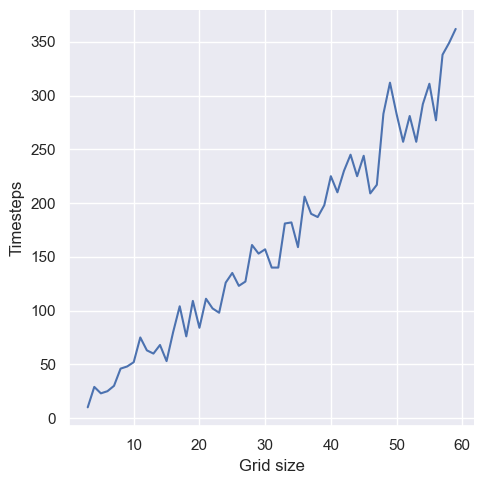

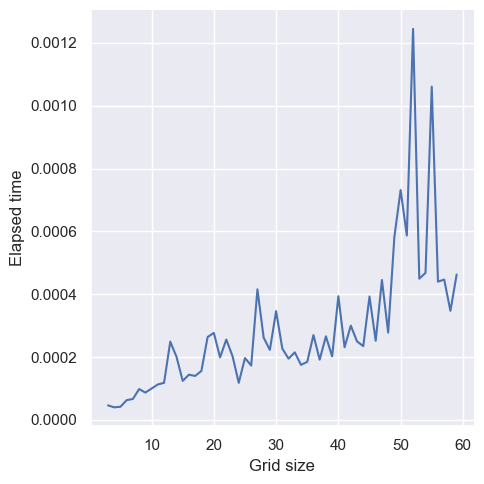

In [57]:
import time 
random_seed = 5


grid_size = []
timesteps = []
elapsed_time = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    start_time = time.time()
    shortest_path, timestep = game.heuristic_algorithm(grid)
    end_time = time.time()
    dt = end_time - start_time
    
    grid_size.append(x)
    timesteps.append(timestep) 
    elapsed_time.append(dt)

evaluate(grid_size, timesteps, 'Grid size', 'Timesteps')
evaluate(grid_size, elapsed_time, 'Grid size', 'Elapsed time' )


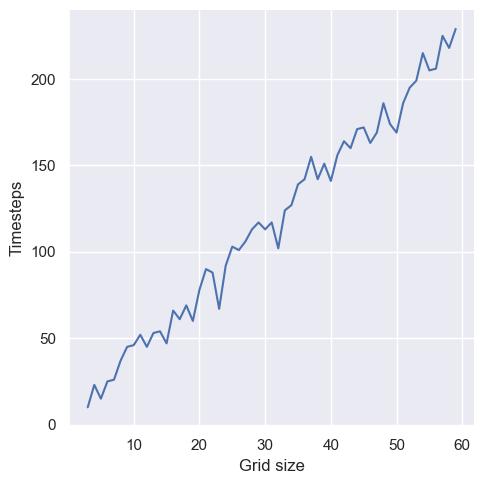

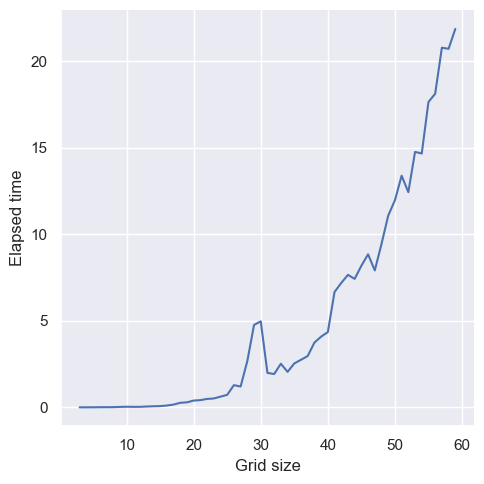

In [59]:
import time 
random_seed = 5


grid_size = []
timesteps = []
elapsed_time = []


for x in range(3,60):
    game = Shortest_Path(x, x)
    grid = game.generate_random_grid(random_seed)
    start_time = time.time()
    shortest_path, timestep, previous_nodes, shortest_path_grid = game.dijkstra_algorithm(grid)
    end_time = time.time()
    dt = end_time - start_time
    
    grid_size.append(x)
    timesteps.append(timestep) 
    elapsed_time.append(dt)

evaluate(grid_size, timesteps, 'Grid size', 'Timesteps')
evaluate(grid_size, elapsed_time, 'Grid size', 'Elapsed time' )

#### 2.2.2. Probability Distribution

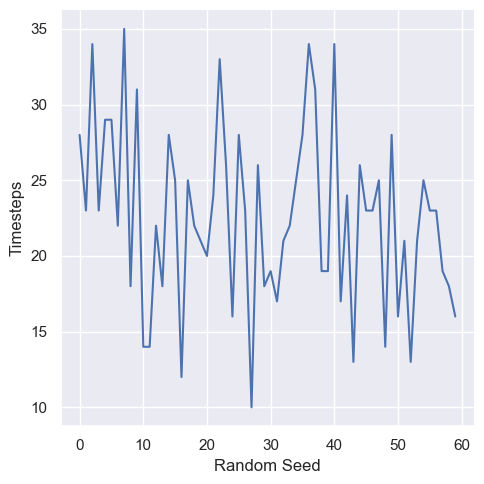

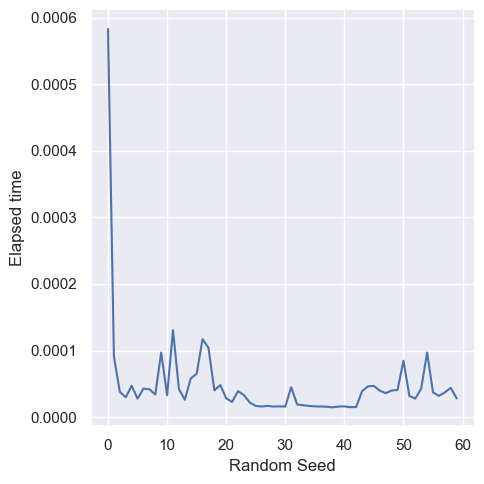

In [68]:
import time 
game = Shortest_Path(4, 4)

seeds = []
timesteps = []
elapsed_time = []


for x in range(60):
    grid = game.generate_random_grid(x)
    start_time = time.time()
    shortest_path, timestep = game.heuristic_algorithm(grid)
    end_time = time.time()
    dt = end_time - start_time
    
    seeds.append(x)
    timesteps.append(timestep) 
    elapsed_time.append(dt)

evaluate(seeds, timesteps, 'Random Seed', 'Timesteps')
evaluate(seeds, elapsed_time, 'Random Seed', 'Elapsed time')

### 2.3. Conclusions